In [8]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.ticker as ticker


csvpath = os.path.join("../project_1/California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns

pd.set_option('display.max_columns',None)


calfire


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2019-10-10T18:11:00Z,NaN,False,True,NaN,NaN,NaN,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,100.0,NaN,True,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,29,NaN,NaN,NaN,2019-06-28T17:33:00Z,NaN,False,True,NaN,NaN,NaN,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,100.0,NaN,True,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b32

In [9]:
# Drop unnecessary columns
columns_to_drop = ['Active', 'Featured', 'Final', 'PercentContained', 'Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)


In [11]:
# Convert datetime columns
calfire['Started'] = pd.to_datetime(calfire['Started'], format='ISO8601')
calfire['Updated'] = pd.to_datetime(calfire['Updated'], format='ISO8601')
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'], format='ISO8601')

In [12]:
# Extract year and month
calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]

In [13]:
calfire = calfire.fillna({
    'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement': '', 'ControlStatement': '', 
    'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
    'FuelType': '', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
    'SearchDescription': '', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
    'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0
})


In [14]:
# Convert data types
calfire.loc[:, 'AcresBurned'] = calfire['AcresBurned'].astype('int64')
calfire.loc[:, 'AirTankers'] = calfire['AirTankers'].astype('int64')
calfire.loc[:, 'CrewsInvolved'] = calfire['CrewsInvolved'].astype('int64')
calfire.loc[:, 'Dozers'] = calfire['Dozers'].astype('int64')
calfire.loc[:, 'Engines'] = calfire['Engines'].astype('int64')
calfire.loc[:, 'Fatalities'] = calfire['Fatalities'].astype('int64')
calfire.loc[:, 'Injuries'] = calfire['Injuries'].astype('int64')
calfire.loc[:, 'Helicopters'] = calfire['Helicopters'].astype('int64')
calfire.loc[:, 'PersonnelInvolved'] = calfire['PersonnelInvolved'].astype('int64')
calfire.loc[:, 'StructuresDamaged'] = calfire['StructuresDamaged'].astype('int64')
calfire.loc[:, 'StructuresDestroyed'] = calfire['StructuresDestroyed'].astype('int64')
calfire.loc[:, 'StructuresEvacuated'] = calfire['StructuresEvacuated'].astype('int64')
calfire.loc[:, 'StructuresThreatened'] = calfire['StructuresThreatened'].astype('int64')
calfire.loc[:, 'WaterTenders'] = calfire['WaterTenders'].astype('int64')


In [15]:
# Calculate average burned area per firefighter
calfire['AcresPerFirefighter'] = calfire['AcresBurned'] / calfire['PersonnelInvolved'].replace(0, 1)

In [16]:
# Set Seaborn style
sns.set_theme(style="darkgrid")

In [17]:
# Ensure only numeric columns are aggregated
calfire_grouped = calfire.groupby('YearStarted', as_index=False).sum(numeric_only=True)

In [18]:
# Set Seaborn style for beautiful visuals
sns.set_theme(style="whitegrid")

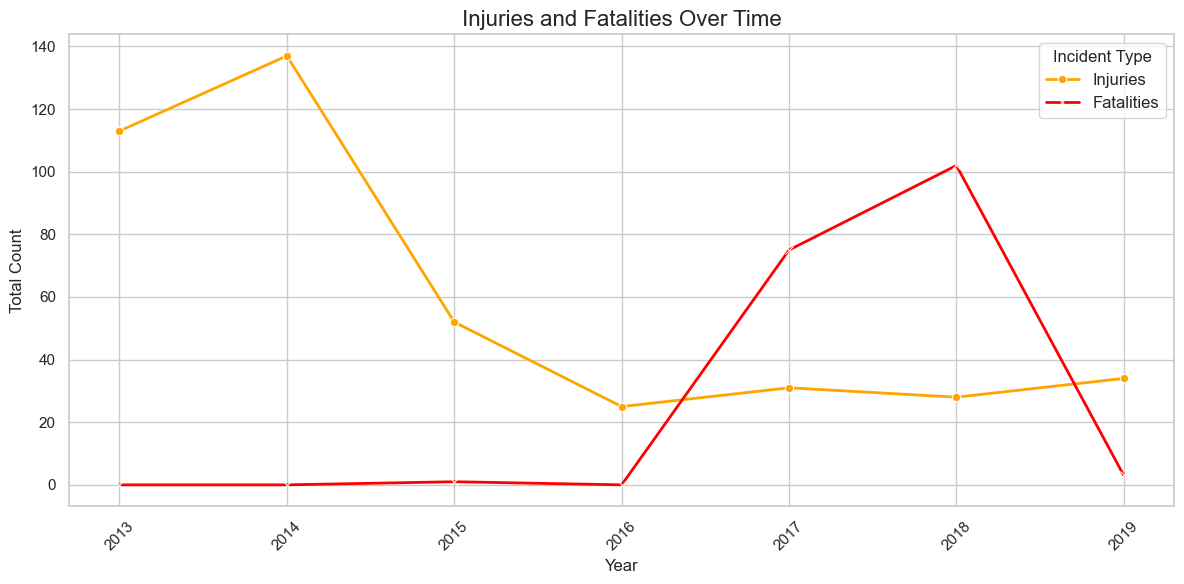

In [19]:
# Plot 1: Injuries and Fatalities Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=calfire_grouped, x='YearStarted', y='Injuries', label='Injuries', marker='o', color='orange', linewidth=2)
sns.lineplot(data=calfire_grouped, x='YearStarted', y='Fatalities', label='Fatalities', marker='x', color='red', linewidth=2)
plt.title('Injuries and Fatalities Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.legend(title='Incident Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


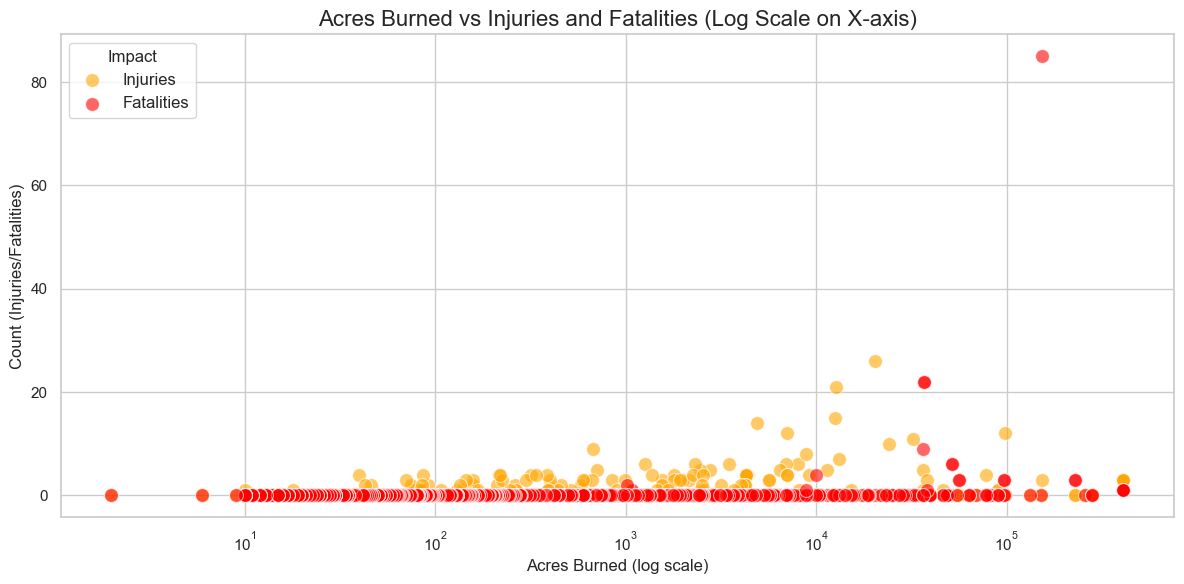

In [20]:
# Plot 2: Acres Burned vs Injuries and Fatalities (Scatter Plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=calfire, x='AcresBurned', y='Injuries', alpha=0.6, color='orange', label='Injuries', s=100)
sns.scatterplot(data=calfire, x='AcresBurned', y='Fatalities', alpha=0.6, color='red', label='Fatalities', s=100)
plt.xscale('log')
plt.title('Acres Burned vs Injuries and Fatalities (Log Scale on X-axis)', fontsize=16)
plt.xlabel('Acres Burned (log scale)', fontsize=12)
plt.ylabel('Count (Injuries/Fatalities)', fontsize=12)
plt.legend(title='Impact', fontsize=12)
plt.tight_layout()
plt.show()


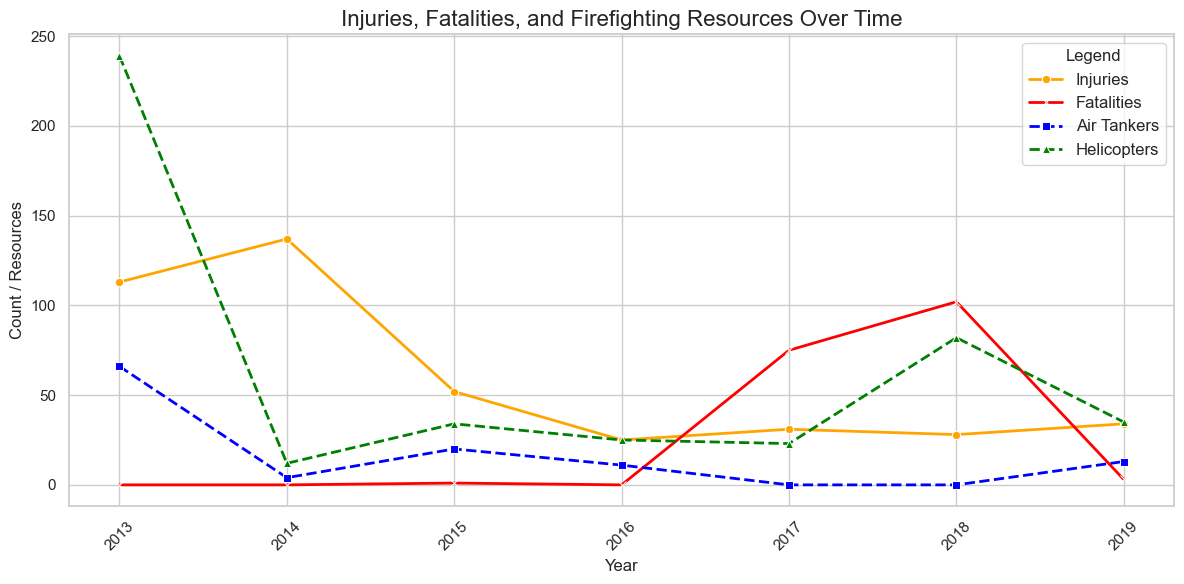

In [21]:
# Plot 3: Comparison of Injuries and Fatalities with Firefighting Resources Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=calfire_grouped, x='YearStarted', y='Injuries', label='Injuries', marker='o', color='orange', linewidth=2)
sns.lineplot(data=calfire_grouped, x='YearStarted', y='Fatalities', label='Fatalities', marker='x', color='red', linewidth=2)
sns.lineplot(data=calfire_grouped, x='YearStarted', y='AirTankers', label='Air Tankers', marker='s', color='blue', linewidth=2, linestyle='--')
sns.lineplot(data=calfire_grouped, x='YearStarted', y='Helicopters', label='Helicopters', marker='^', color='green', linewidth=2, linestyle='--')
plt.title('Injuries, Fatalities, and Firefighting Resources Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count / Resources', fontsize=12)
plt.legend(title='Legend', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

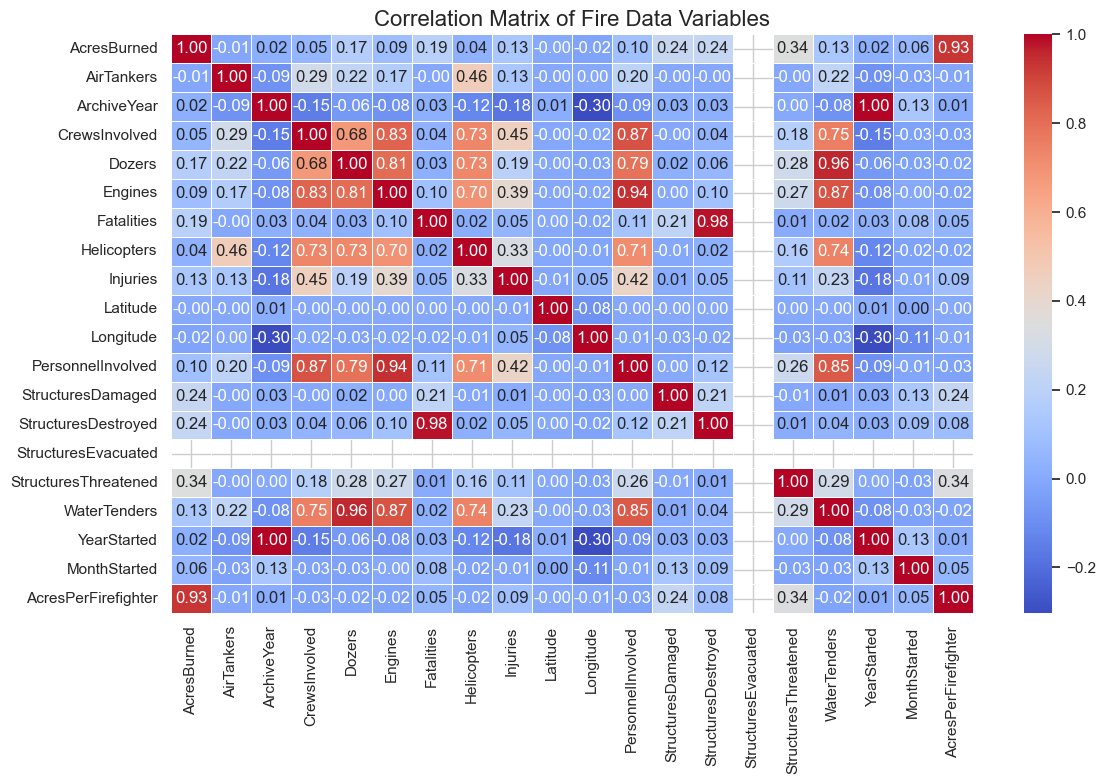

In [22]:
numeric_data = calfire.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Fire Data Variables', fontsize=16)
plt.tight_layout()
plt.show()

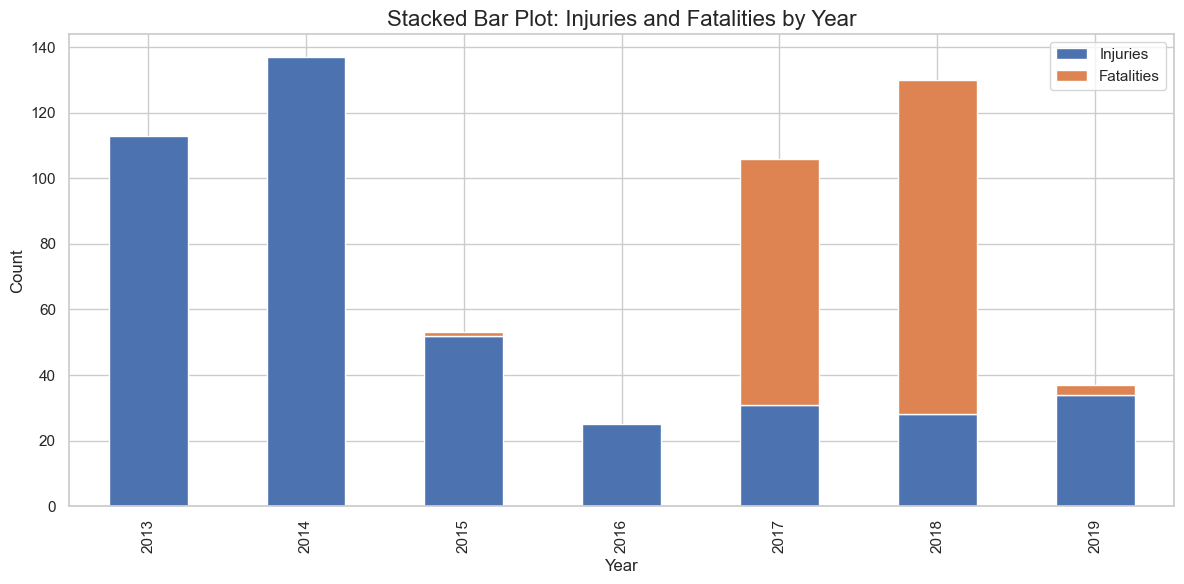

In [23]:
injuries_fatalities_by_year = calfire_grouped[['YearStarted', 'Injuries', 'Fatalities']]
injuries_fatalities_by_year.set_index('YearStarted').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot: Injuries and Fatalities by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

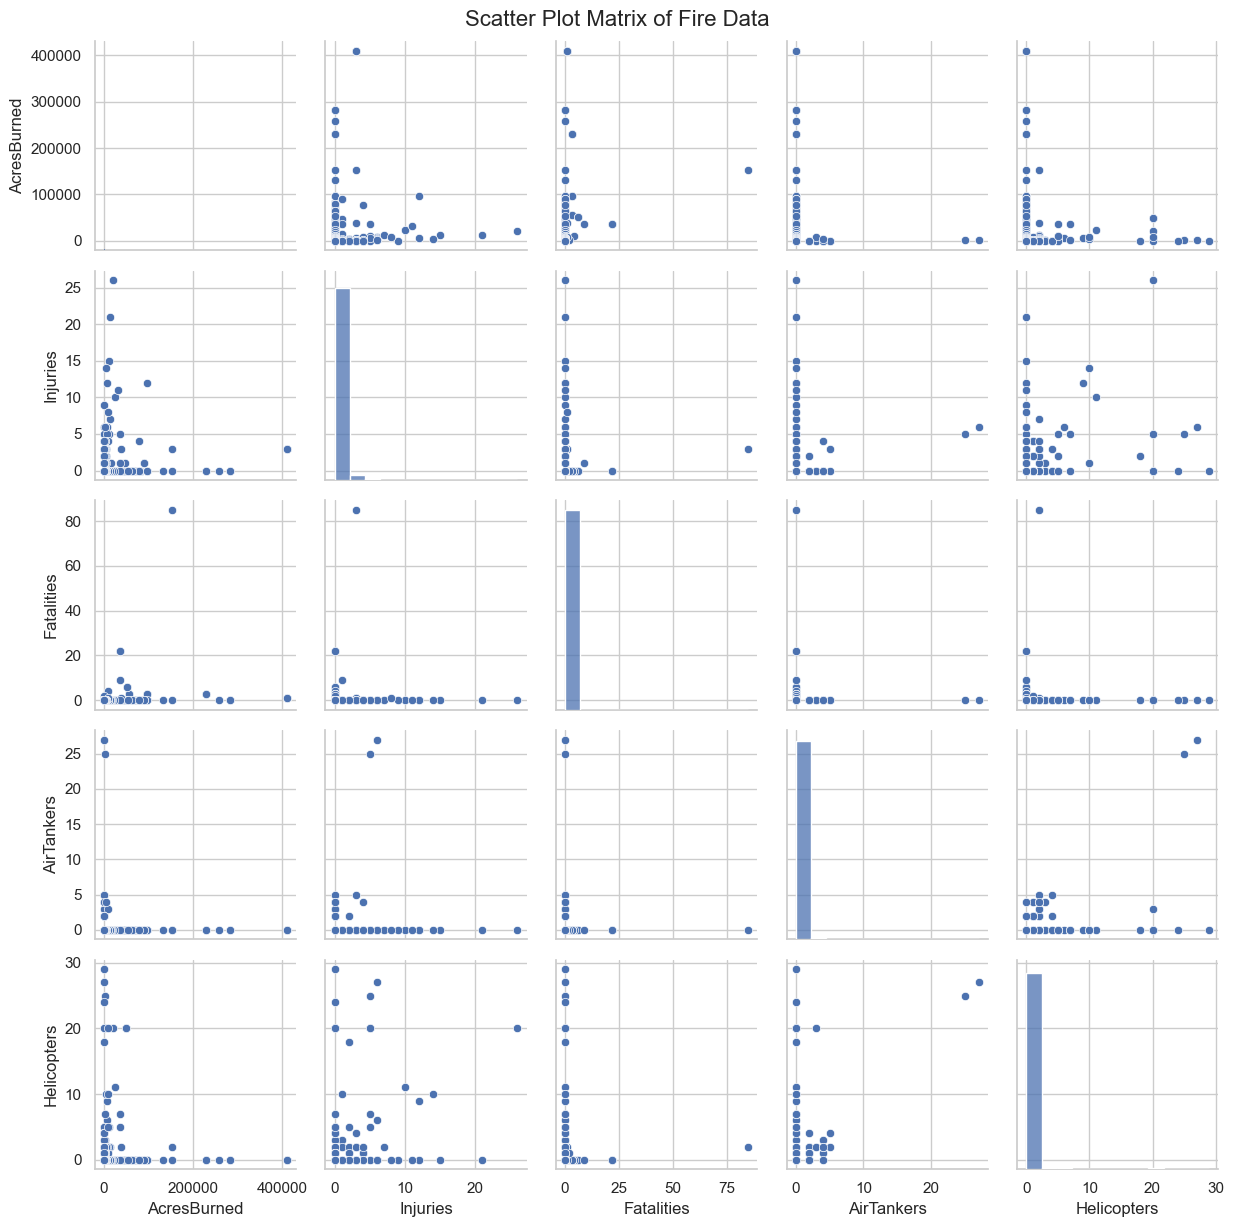

In [24]:
sns.pairplot(calfire[['AcresBurned', 'Injuries', 'Fatalities', 'AirTankers', 'Helicopters']])
plt.suptitle('Scatter Plot Matrix of Fire Data', fontsize=16)
plt.tight_layout()
plt.show()


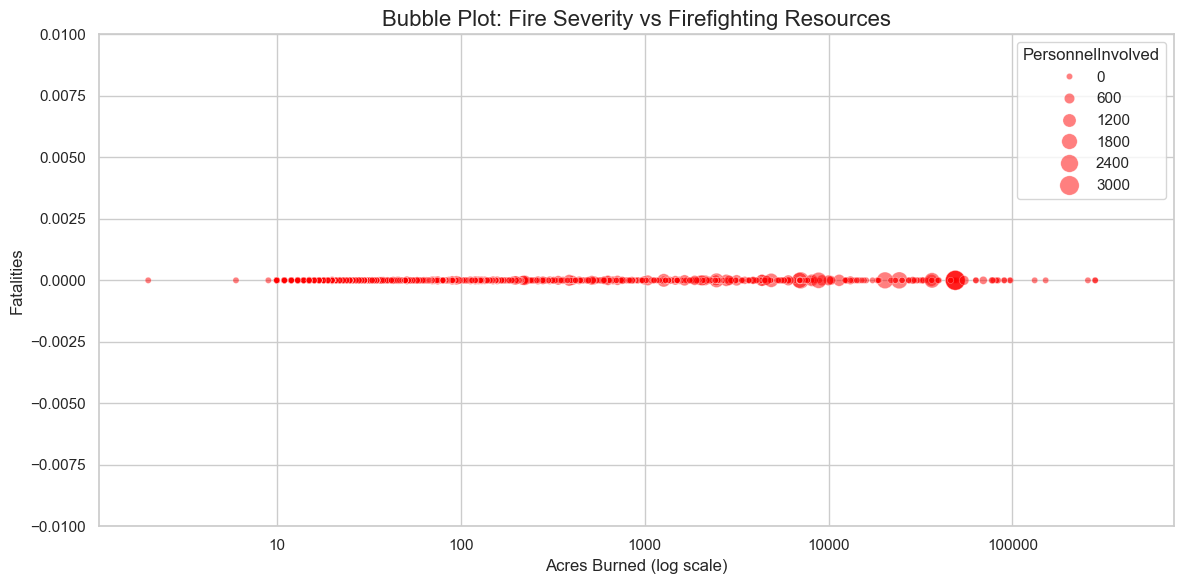

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=calfire, x='AcresBurned', y='Fatalities', size='PersonnelInvolved', sizes=(20, 200), alpha=0.5, color='red')

# Set log scale for x-axis and fix the ticks
plt.xscale('log')

# Define the tick positions for natural numbers (log scale)
ticks = [10, 100, 1000, 10000, 100000]
plt.xticks(ticks, labels=[str(i) for i in ticks])

# Title and labels
plt.title('Bubble Plot: Fire Severity vs Firefighting Resources', fontsize=16)
plt.xlabel('Acres Burned (log scale)', fontsize=12)
plt.ylabel('Fatalities', fontsize=12)

# Limit y-axis to 0-20 and move up slightly
plt.ylim(-0.01, 0.01)  # Set minimum y-axis value to 1 instead of 0

# Adjust layout and show plot
plt.tight_layout()
plt.show()